In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape for CNN: (samples, width, height, channels)
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:

model = Sequential([
    Input(shape=(28, 28, 1)),  # ✅ define input shape here
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8878 - loss: 0.3824 - val_accuracy: 0.9818 - val_loss: 0.0661
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9798 - loss: 0.0655 - val_accuracy: 0.9842 - val_loss: 0.0616
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9876 - loss: 0.0410 - val_accuracy: 0.9825 - val_loss: 0.0635
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.9873 - val_loss: 0.0517
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9941 - loss: 0.0184 - val_accuracy: 0.9880 - val_loss: 0.0483


In [14]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9822 - loss: 0.0531
Test Accuracy: 0.9850999712944031


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


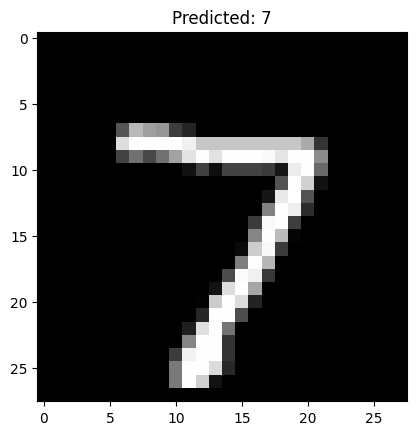

In [15]:
predictions = model.predict(x_test)

# Show one prediction
index = 0
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted: {np.argmax(predictions[index])}")
plt.show()